# **AdolescentMind**

# Predicting Anxiety and Depression in Adolescents

<img src="Adolescents.jpg" alt="Adolescents" width="600" height="300">

# 1. Business Understanding

## 1.1. Business Overview

Mental health issues like **depression** and **anxiety** are increasingly becoming a top public health worry - especially amongst teenagers. `The World Health Organisation (WHO, 2023)` says that nearly 1 in 7 teenagers between the age of 10-19 experience some kind of mental health issue. And between depression and anxiety, these two are right up there as leading causes of illness and disability in this age group. Meanwhile, despite all the awareness campaigns, mental health still carries a major stigma, especially in places like Kenya.

This project tries to get around the problems with that by using machine learning techniques to develop a model that can pick up on the signs of depression and anxiety in teenagers based on their answers to the widely-used `Patient Health Questionnaire (PHQ-9)` and `Generalized Anxiety Disorder Scale (GAD-7)`. These are both scales that have been well tested and widely used around the world for identifying early symptoms of depression and anxiety.

**The goal is to develop a simple and scalable method of early mental health screening in Kenyan schools** by analyzing the data on PHQ-9 and GAD-7 responses along with demographic information like age, gender, and school type. The aim is to help school counselors, teachers and healthcare providers spot at risk students in good time, and get them the support they need early, to stop mental illness from causing long-term problems. We hope to fit in with the requirements of `Kenya's Mental Health (Amendment) Act of 2022`, which strongly emphasizes early detection, prevention and integrating mental health services with education. Given all the rising concerns about adolescent mental health, getting this right, with a data-driven approach, could be a game-changer for boosting mental well-being, academic performance, and the overall wellbeing of teenagers in Kenya.

## 1.2. Stakeholder

- Counselors
- Teachers
- Healthcare providers

## 1.3. Problem Statement

- According to the Ministry of Health in 2021 up to 45% of secondary school kids showed symptoms that suggest they're struggling with some form of psychological distress, yet you're unlikely to find much by way of mental health screening in most schools. And even if there was, the truth is most places just don't have the trained professionals on hand to actually do anything about it and to top it all off there's a lot of stigma around mental illness - which means kids will often only come forward once things have gotten pretty bad.

- Right now when it comes to identifying teens who are struggling with depression or anxiety, schools and healthcare places are mostly just relying on manual assessments by local counselors or healthcare workers - a process that is just plain time consuming and not always reliable, and really hard to scale up across schools. So what ends up happening is lots of cases just get missed, kids start to fall behind with their studies, they start self medicating with drugs and in some cases the risk of suicide actually increases.



## 1.4. Business Objectives

### 1.4.1. Main Objective

- To build a machine learning model capable of identifying depression and anxiety among Kenyan adolescents using responses from PHQ, GAD and other demographic assessments.

### 1.4.2. Specific Objectives

- Analyze adolescent survey data to find out what the  major demographic factors mostly contribute to depression and anxiety.

- Build and compare models that can classify students as depressed, anxious, or none based on their responses.

- Perform model evaluation using accuracy, precision, recall and F1-score.

- Interpret model outputs and find out what are the most important factors that contribute to depression and anxiety prediction.

### 1.5. Research Questions

What demographic factors are linked to depression and anxiety in Kenyan teenagers?

Can PHQ and GAD scores be used to predict depression and anxiety levels?

Which algorithm works best in predicting teenagers at risk of depression or anxiety?

How can these insights be used to support early intervention and mental health awareness in Kenyan schools?


### 1.6. Project Goals

- To build a machine learning model that classifies teenagers as depressed, anxious or none based on survey data.

- To combine demographic and psychological data (PHQ and GAD) for better mental health prediction.

- To get actionable insights that can help school administrators, counselors and policymakers support adolescent mental health.


### 1.7. Success Criteria

- Accuracy:

At least 80% accuracy and balanced performance across precision, recall and F1-score.

- Reliability:

Model performs well on both training and test data, no overfitting.

- Interpretability:

Key features used in predictions (e.g. PHQ, GAD items, demographics) are clear and explainable to non-technical people.

- Ethical and Practical:

System handles mental health data ethically and can be realistically implemented in school health systems.

- Impact:

Findings can inform early detection programs and resource allocation for adolescent mental health in Kenya.

# 2. Data Understanding

## 2.1. Data Source & Description

- The dataset source is from OSFstorage and the survey was conducted by Shamiri Institute research staff together with schools, teachers and students who also made contibutions in the research. It is publicly available and for more information about the dataset you can follow this link: https://osf.io/preprints/osf/yvdsc_v2

- The dataset contains surveys from about 17,000 adolescents in different Kenyan counties. Each row contains a students demographic background alongside the PHQ and GAD questions. Our main objective is to predict whether a person has Depression, Anxiety or none.

- For this project this dataset is suitable because because it has many predictors:

    - Demographics: Age, Gender, Form, Religion, Boarding_day e.t.c
    - Depression Indicator Questions: PHQ'S
    - Anxiety Indicator Questions: GAD'S

# 3. Data Preparation

## 3.1 Data Loading

In [1]:
# importing the necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
import numpy as np
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('Merged Survey A to Survey F Data.csv')

## 3.2 Data Exploration

In [3]:
# previewing the first five records in the dataset
df.head()

,participant_ID,survey_number,school_name,Age,Gender,Form,Religion,Boarding_day,School_type,School_Demographics,...,HSB_4,HSB_5,HSB_6,HSB_7,HSB_8,HSB_9,HSB_10,HSB_11,HSB_12,HSB_13
0,A_1,Survey A,the komarock,14.0,1.0,1.0,1.0,Day & Boarding,Subcounty,Mixed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A_2,Survey A,kihara,13.0,1.0,1.0,1.0,Day,Subcounty,Mixed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A_3,Survey A,claycity,14.0,1.0,1.0,NaN,Day,Subcounty,Mixed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A_4,Survey A,kibichiku,17.0,2.0,3.0,2.0,Day,Subcounty,Mixed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A_5,Survey A,our lady of fatima,14.0,1.0,1.0,1.0,Day,Subcounty,Mixed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# selecting the relevant features for our analysis
df = df[[
    "participant_ID","Age", "Gender", "Form", "Religion", "Boarding_day", "School_type",
    "School_Demographics", "School_County",
    "Parents_Home", "Parents_Dead", "Fathers_Education", "Mothers_Education",
    "Co_Curricular", "Sports", "Percieved_Academic_Abilities",
    "PHQ_1", "PHQ_2", "PHQ_3", "PHQ_4", "PHQ_5", "PHQ_6", "PHQ_7", "PHQ_8", "PHQ_Functioning",
    "GAD_1", "GAD_2", "GAD_3", "GAD_4", "GAD_5", "GAD_6", "GAD_7", "GAD_Check", "GAD_Functioning"
]]


In [5]:
# checking the dimension of the dataset
df.shape

(17089, 34)

In [6]:
# checking the overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17089 entries, 0 to 17088
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   participant_ID                17089 non-null  object 
 1   Age                           15470 non-null  float64
 2   Gender                        16324 non-null  float64
 3   Form                          16595 non-null  float64
 4   Religion                      16230 non-null  float64
 5   Boarding_day                  17089 non-null  object 
 6   School_type                   17089 non-null  object 
 7   School_Demographics           17089 non-null  object 
 8   School_County                 17089 non-null  object 
 9   Parents_Home                  16512 non-null  float64
 10  Parents_Dead                  16464 non-null  float64
 11  Fathers_Education             16130 non-null  float64
 12  Mothers_Education             16308 non-null  float64
 13  C

In [7]:
# general statistics
df.describe()

,Age,Gender,Form,Religion,Parents_Home,Parents_Dead,Fathers_Education,Mothers_Education,Co_Curricular,Sports,...,PHQ_Functioning,GAD_1,GAD_2,GAD_3,GAD_4,GAD_5,GAD_6,GAD_7,GAD_Check,GAD_Functioning
count,15470.000000,16324.000000,16595.000000,16230.000000,16512.000000,16464.000000,16130.000000,16308.000000,16284.000000,13836.000000,...,15765.000000,16167.000000,16255.000000,16336.000000,16138.000000,16161.000000,16209.000000,16259.000000,14754.000000,15815.000000
mean,15.901551,1.462509,2.042904,1.901972,1.620882,3.621113,2.442405,2.505580,1.883997,1.416667,...,0.939740,0.771634,1.100954,1.232431,0.690234,0.538086,1.034734,1.036411,0.167141,0.889915
std,1.421351,0.498608,1.007428,1.748903,0.540791,0.935719,1.191320,1.076189,0.791617,0.493024,...,0.806153,0.926899,1.090507,1.107131,0.957693,0.860822,1.064766,1.058983,0.559351,0.821541
min,11.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,17.000000,2.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000
max,25.000000,2.000000,4.000000,8.000000,2.000000,4.000000,4.000000,4.000000,3.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


The min and max values for columns like GAD and PHQ are 0 to 3 and after some research we concluded that they are scores which could mean:
- 0	= Not at all	
- 1 =	Several days	
- 2 = More than half the days
- 3 = Nearly every day

In [8]:
df.select_dtypes(include=['object', 'float64','int64']).nunique().sort_values(ascending=False)

participant_ID                  17089
Age                                15
Religion                            7
Percieved_Academic_Abilities        5
School_County                       4
Form                                4
Fathers_Education                   4
Mothers_Education                   4
Parents_Dead                        4
PHQ_2                               4
PHQ_1                               4
PHQ_Functioning                     4
PHQ_8                               4
PHQ_7                               4
PHQ_6                               4
PHQ_5                               4
PHQ_4                               4
PHQ_3                               4
GAD_2                               4
GAD_3                               4
GAD_4                               4
GAD_5                               4
GAD_6                               4
GAD_7                               4
GAD_Check                           4
GAD_1                               4
GAD_Function

- Most columns have a reasonable number of unique categories

## 3.3 Check for missing values
We check for missing values in the dataset and evaluate their number to decide on the best way on handling them. 

In [9]:
# checking for missing values
df.isna().sum()

participant_ID                     0
Age                             1619
Gender                           765
Form                             494
Religion                         859
Boarding_day                       0
School_type                        0
School_Demographics                0
School_County                      0
Parents_Home                     577
Parents_Dead                     625
Fathers_Education                959
Mothers_Education                781
Co_Curricular                    805
Sports                          3253
Percieved_Academic_Abilities     597
PHQ_1                           1117
PHQ_2                            756
PHQ_3                            899
PHQ_4                            887
PHQ_5                            884
PHQ_6                            855
PHQ_7                            790
PHQ_8                           1224
PHQ_Functioning                 1324
GAD_1                            922
GAD_2                            834
G

- Many columns contain missing values.
- Though the percentage of the missing values per column is not large we have to come up with a good way of filling in the missing values because dropping those missing values could have an impact on our model as they are important.

## 3.4 Check for duplicate values

In [10]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

We have no duplicate records.

## 3.5 Dealing with missing values

In [11]:
# Separate numerical and categorical
num_cols = df.select_dtypes(include=['float64']).columns
cat_cols = df.select_dtypes(include='object').columns

# Median for numerical
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Mode for categorical
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [12]:
df.isnull().sum()

participant_ID                  0
Age                             0
Gender                          0
Form                            0
Religion                        0
Boarding_day                    0
School_type                     0
School_Demographics             0
School_County                   0
Parents_Home                    0
Parents_Dead                    0
Fathers_Education               0
Mothers_Education               0
Co_Curricular                   0
Sports                          0
Percieved_Academic_Abilities    0
PHQ_1                           0
PHQ_2                           0
PHQ_3                           0
PHQ_4                           0
PHQ_5                           0
PHQ_6                           0
PHQ_7                           0
PHQ_8                           0
PHQ_Functioning                 0
GAD_1                           0
GAD_2                           0
GAD_3                           0
GAD_4                           0
GAD_5         

## 3.6 Exploratory Data Analysis

### 3.6.1 Univariate Analysis

**Distribution of features.**

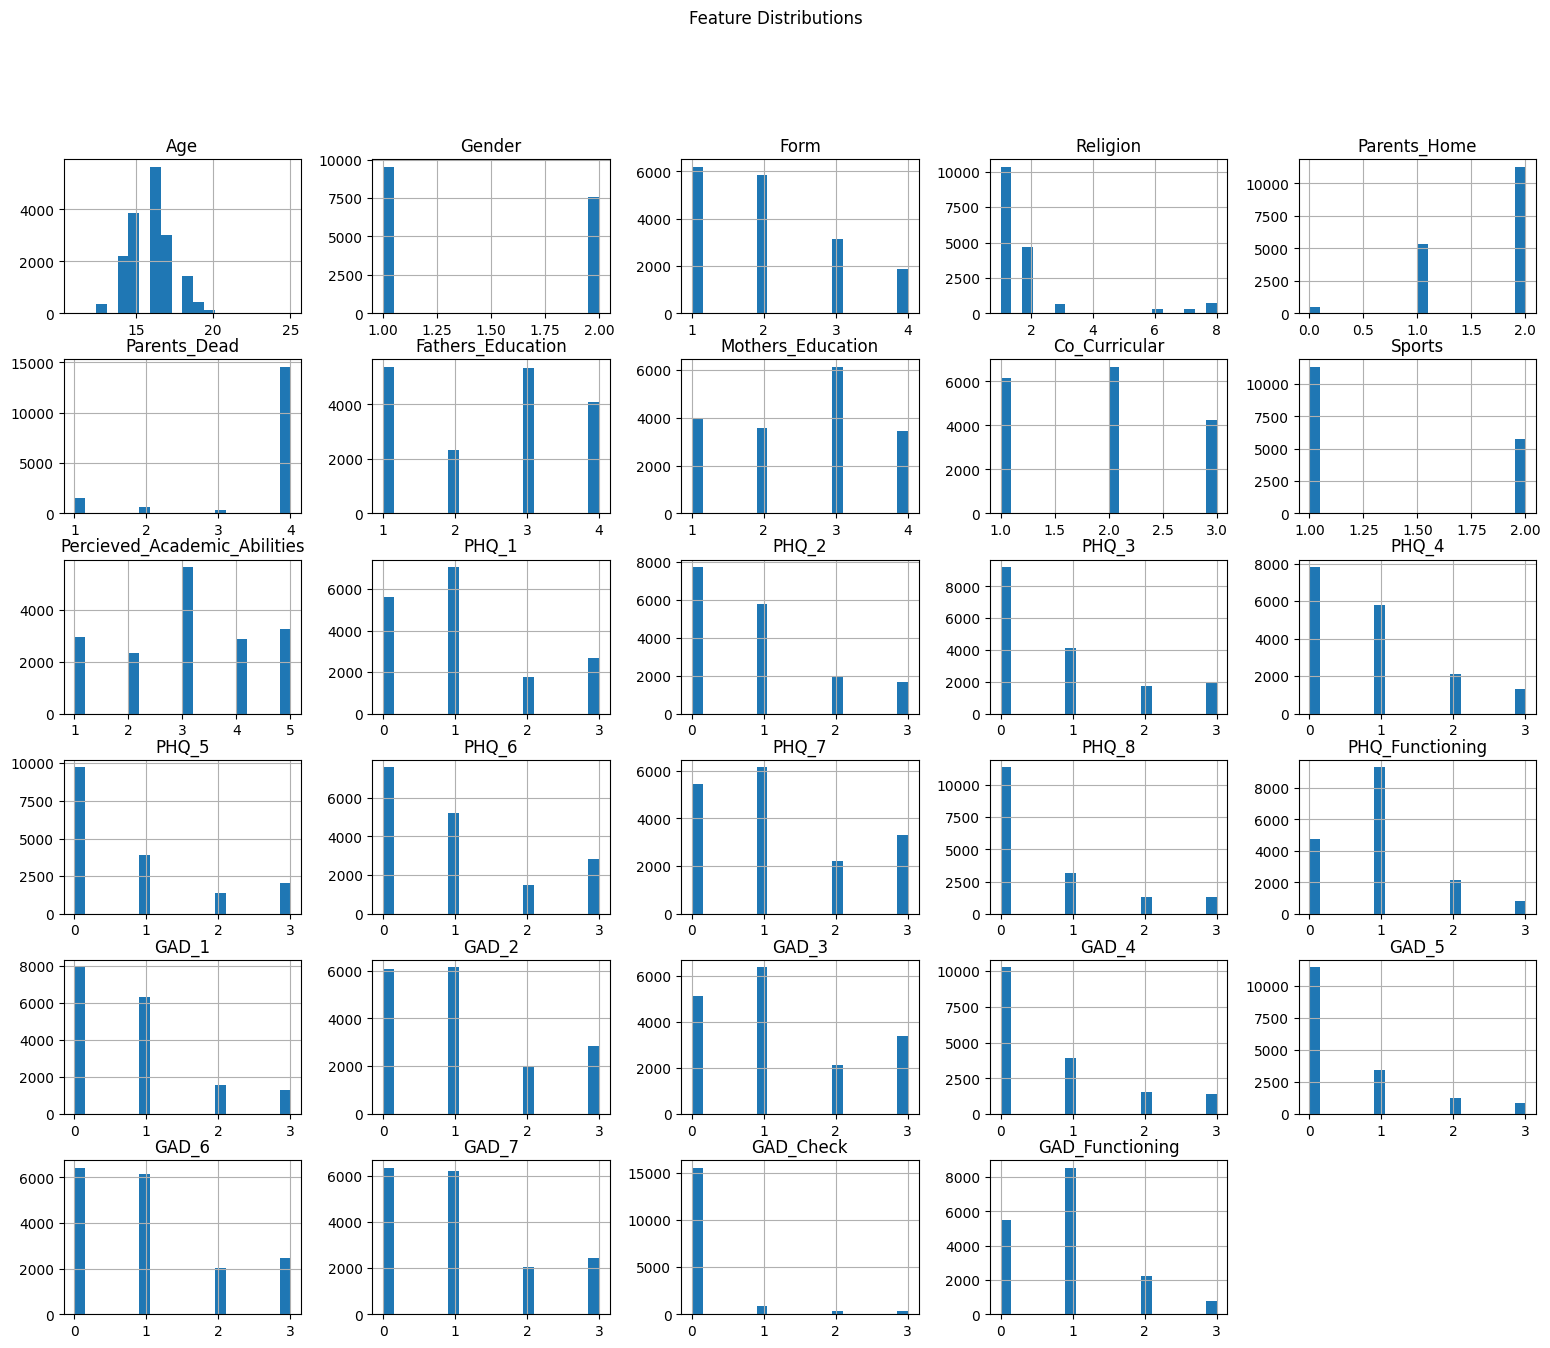

In [13]:
# Checking how the features are distributed
df.hist(bins=20, figsize=(19, 15))
plt.suptitle("Feature Distributions")
plt.show()

In [14]:
# checking for age valuecounts
df['Age'].value_counts()

Age
16.0    5649
15.0    3881
17.0    2997
14.0    2195
18.0    1430
19.0     447
13.0     340
20.0     111
21.0      16
12.0       9
22.0       8
24.0       2
23.0       2
11.0       1
25.0       1
Name: count, dtype: int64

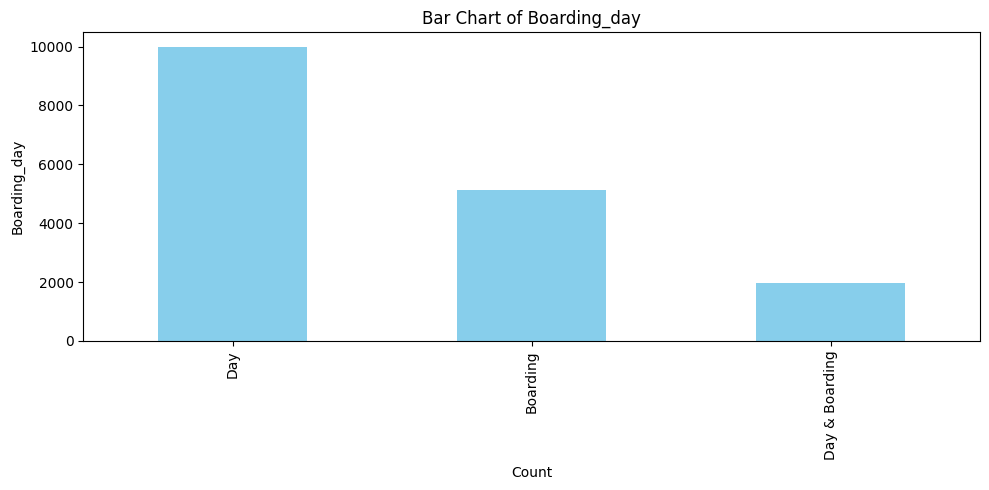

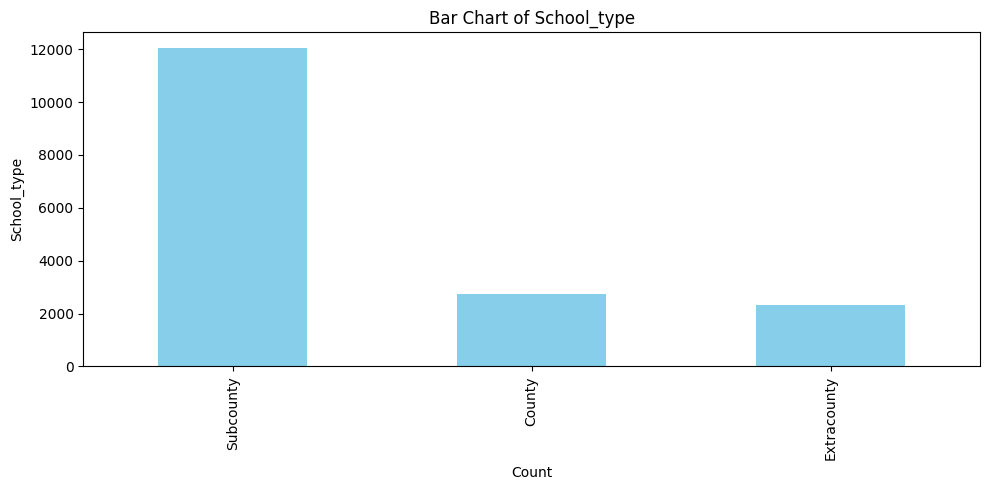

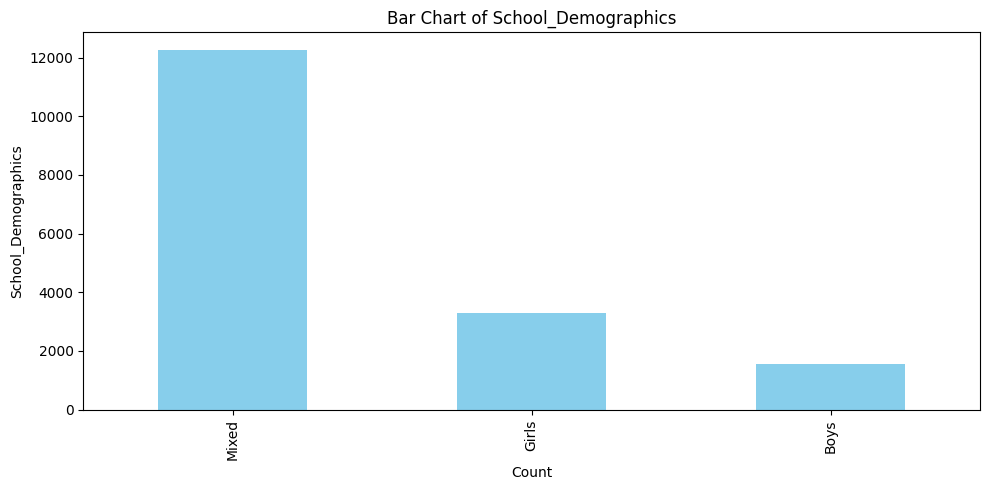

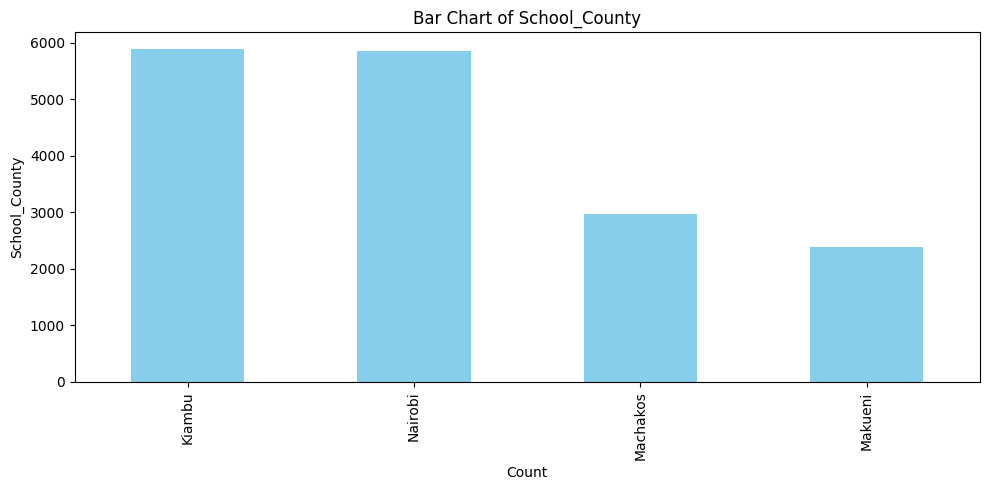

["Column 'Boarding_day' has 3 unique categories. The most common category is 'Day' with 9983 entries.",
 "Column 'School_type' has 3 unique categories. The most common category is 'Subcounty' with 12034 entries.",
 "Column 'School_Demographics' has 3 unique categories. The most common category is 'Mixed' with 12252 entries.",
 "Column 'School_County' has 4 unique categories. The most common category is 'Kiambu' with 5888 entries."]

In [15]:
categorical_columns = df.select_dtypes(include=['object']).drop(columns=['participant_ID'], errors='ignore')

# initialize a list to store findings
categorical_findings = []

# set a for loop to "loop" through the categorical columns set above
for column in categorical_columns.columns:
    #set figure size
    plt.figure(figsize=(10, 5))  
    
    #show the value counts
    value_counts = df[column].value_counts()

    # Selecting to show the top 50 categories for readability
    top_categories = value_counts[:20]  
    
    # visuaizing using a bar chart
    top_categories.plot(kind='bar', color='skyblue')

    #plot titles
    plt.title(f'Bar Chart of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    
    # Adjust layout for readability
    plt.tight_layout()  
    plt.show()

     # Collect findings
    categorical_findings.append(
        f"Column '{column}' has {len(value_counts)} unique categories. The most common category is '{value_counts.idxmax()}' with {value_counts.max()} entries."
    )

categorical_findings

## Findings:
There are 4 `categorical columns` for which we have plotted the bar charts above. Here are some notable observations:

1. **Boarding_day**:

    - This column has 3 unique categories. The most common name is "Day" appearing 9983 times. This column is useful for analysis.
2. **School_type**:
    - There are 3 categories. The most common category is Subcounty with 12034 entries, suggesting a high prevalence of subcounty schools in the dataset.
3. **School_Demographics**:

    - This column has 3 categories, with Mixed being the most common, it is represented by 12252 entries. This indicates that the majority of schools surveyed are Mixed High Schools.
4. **School_County**:

    - There are 4 categories (Kiambu, Nairobi, Machakos, Makueni). Kiambu is the most frequent, with 5888 entries, reflecting that most schools surveyed are from that region.

In [16]:
# Depression total and category
df['PHQ_Totals'] = df[[f'PHQ_{i}' for i in range(1, 9)]].sum(axis=1)

# Anxiety total and category
df['GAD_Totals'] = df[[f'GAD_{i}' for i in range(1, 8)]].sum(axis=1)

def phq_category(score):
    if score <= 4: return 0   # none
    elif score <= 9: return 1 # mild
    elif score <= 14: return 2 # moderate
    elif score <= 19: return 3 # moderately severe
    else: return 4             # severe

def gad_category(score):
    if score <= 4: return 0   # minimal
    elif score <= 9: return 1 # mild
    elif score <= 14: return 2 # moderate
    else: return 3             # severe

# Apply the numeric classification
df['Is_Depressed'] = df['PHQ_Totals'].astype(int).apply(phq_category)
df['Has_anxiety'] = df['GAD_Totals'].astype(int).apply(gad_category)


Text(0, 0.5, 'Frequency')

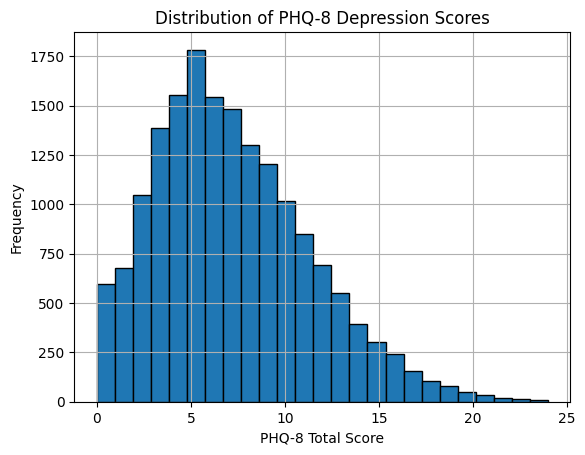

In [17]:
# Distribution of total scores 
df['PHQ_Totals'] = df[[f'PHQ_{i}' for i in range(1,9)]].sum(axis=1)
df['PHQ_Totals'].hist(bins=25, edgecolor='black')
plt.title('Distribution of PHQ-8 Depression Scores')
plt.xlabel('PHQ-8 Total Score')
plt.ylabel('Frequency')

- The majority of participants have low to moderate PHQ-8 depression scores, indicating `mild` or `minimal` depressive symptoms in most of the sample. The distribution is `positively skewed`, with fewer individuals exhibiting high levels of depressive symptoms.

Text(0.5, 1.0, 'Mean Scores by PHQ-8 Item')

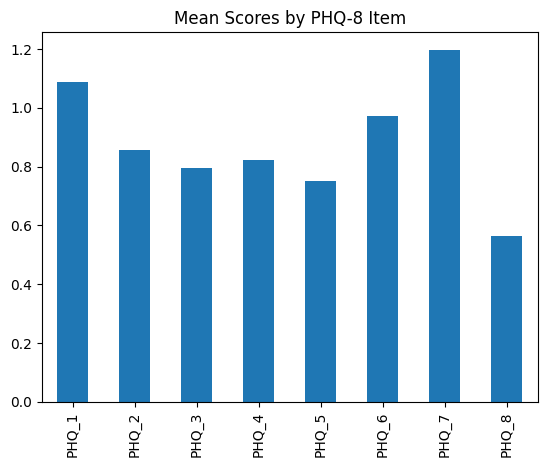

In [18]:
# Calculating PHQ mean
phq_items = [f'PHQ_{i}' for i in range(1,9)]
df[phq_items].mean().plot(kind='bar')
plt.title('Mean Scores by PHQ-8 Item')

The mean item scores suggest that `loss of interest` and `concentration difficulties` are the most frequently reported depressive symptoms, while `psychomotor symptoms` are least reported. This indicates **variability in symptom expression across the sample**.

In [ ]:
phq_columns = [f'PHQ_{i}' for i in range(1, 9)]

for col in phq_columns:
    unique_vals = df[col].unique()
    print(f"{col} unique values: {unique_vals}\n")

Text(0.5, 1.0, 'Distribution of GAD-7 Anxiety Scores')

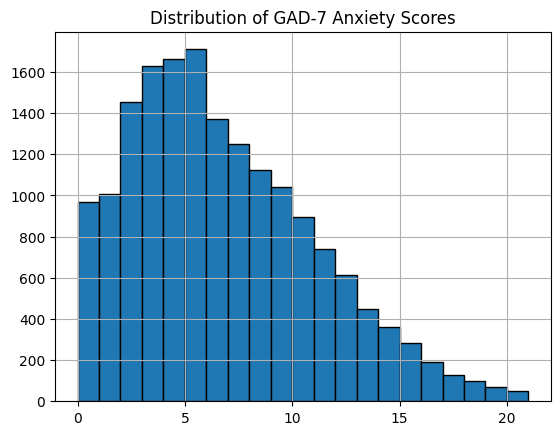

In [19]:
# Calculating GAD mean
df['GAD_Totals'] = df[[f'GAD_{i}' for i in range(1,8)]].sum(axis=1)
df['GAD_Totals'].hist(bins=21, edgecolor='black')
plt.title('Distribution of GAD-7 Anxiety Scores')

The distribution is `positively skewed`, with fewer individuals exhibiting high levels of anxiety symptoms

In [ ]:
phq_items = [f'GAD_{i}' for i in range(1,8)]
df[phq_items].mean().plot(kind='bar')
plt.title('Mean Scores by GAD_-7 Item')
plt.savefig('Image/GAD_Items.png', dpi=300, bbox_inches='tight')

In [ ]:
phq_columns = [f'GAD_{i}' for i in range(1, 8)]

for col in phq_columns:
    unique_vals = df[col].unique()
    print(f"{col} unique values: {unique_vals}\n")

**Comorbidity Analysis**

What percentage of students have both high depression and anxiety?

In [20]:
# Crosstab of depression and anxiety
cross_tab = pd.crosstab(df['Is_Depressed'], df['Has_anxiety'], margins=True)

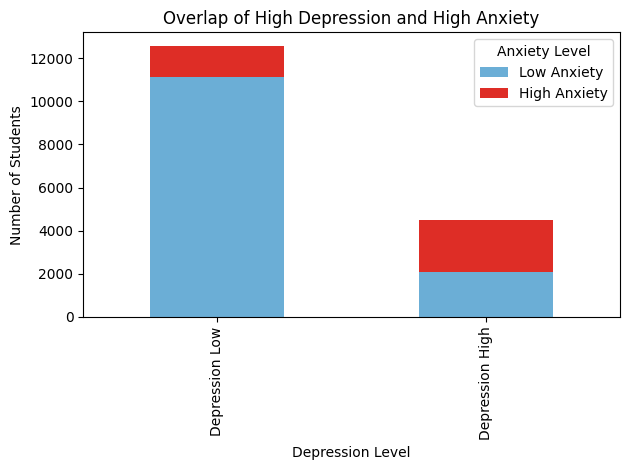

In [ ]:

data = {
    'anxiety_low': [11131, 2086],
    'anxiety_high': [1442, 2430]
}
index = ['Depression Low', 'Depression High']

# Create DataFrame
data1 = pd.DataFrame(data, index=index)

# Plot stacked bar chart
data1.plot(kind='bar', stacked=True, color=['#6baed6', '#de2d26'])
plt.title('Overlap of High Depression and High Anxiety')
plt.ylabel('Number of Students')
plt.xlabel('Depression Level')
plt.legend(title='Anxiety Level', labels=['Low Anxiety', 'High Anxiety'])
plt.savefig('Image/Overlap of High Depression and High Anxiety.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


- This shows how many students fall into each group.
- The `red` portion represents students with high anxiety, and within that, you can clearly see the large segment overlapping with high depression.

### 3.6.2 Bivariate analysis
**Risk Factor Analysis**

**Gender Differences**

In [22]:
# Import libraries
from statsmodels.multivariate.manova import MANOVA

# testing whether Gender affects both Depression and Anxiety together
manova = MANOVA.from_formula('PHQ_Totals + GAD_Totals ~ Gender', data=df)
print(manova.mv_test())


                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.7015 2.0000 17086.0000 3635.9459 0.0000
         Pillai's trace 0.2985 2.0000 17086.0000 3635.9459 0.0000
 Hotelling-Lawley trace 0.4256 2.0000 17086.0000 3635.9459 0.0000
    Roy's greatest root 0.4256 2.0000 17086.0000 3635.9459 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
           Gender         Value  Num DF   Den DF   F Value Pr > F
-----------------------------------------------------------------
            Wilks' lambda 0.9898 2.0000 17086.0000 87.9034 0.0000
           Pillai's trace 0.01

No significant difference of gender on anxiety level or depression.

**Form Trends**

Text(0, 0.5, 'Mean Score')

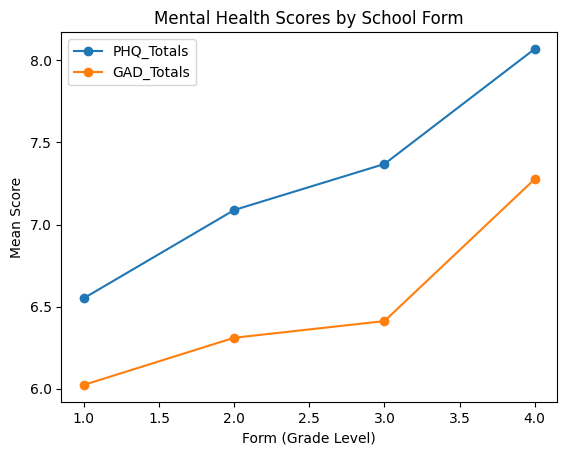

In [ ]:
# visualizing form trend
df.groupby('Form')[['PHQ_Totals', 'GAD_Totals']].mean().plot(kind='line', marker='o')
plt.title('Mental Health Scores by School Form')
plt.xlabel('Form (Grade Level)')
plt.ylabel('Mean Score')
plt.savefig('Image/Mental Health Scores by Form.png', dpi=300, bbox_inches='tight')


School form effect on depression

Sample sizes by Form:
Form 1: n = 6202, Mean = 6.55, SD = 4.20
Form 2: n = 5851, Mean = 7.09, SD = 4.20
Form 3: n = 3158, Mean = 7.37, SD = 4.34
Form 4: n = 1878, Mean = 8.07, SD = 4.44

Levene's test for equal variances: p = 0.0050
Variances are NOT equal. Using Kruskal-Wallis test (non-parametric).
Kruskal-Wallis H-test Results:
H-statistic: 212.976
p-value: 0.0000

Interpretation:
HIGHLY SIGNIFICANT (p < 0.001)
There Are significant differences in depression scores across school forms.


<Figure size 1000x600 with 0 Axes>

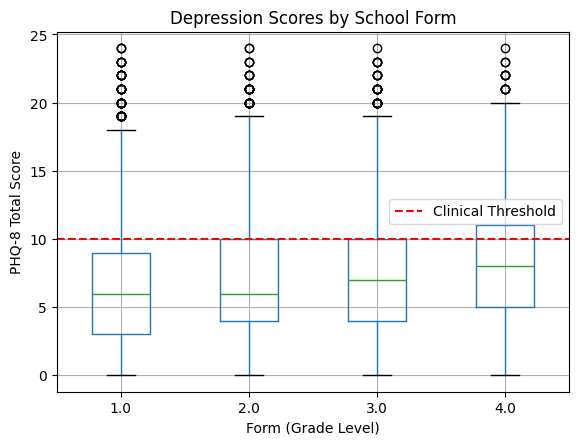

In [ ]:
from scipy import stats
from scipy.stats import kruskal

# form grade level effects
print("School form effect on depression")
# Prepare data by Form
form_groups_phq = [df[df['Form'] == i]['PHQ_Totals'].dropna() for i in [1.0, 2.0, 3.0, 4.0]]

print(f"\nSample sizes by Form:")
for i, grp in enumerate(form_groups_phq, 1):
    print(f"Form {i}: n = {len(grp)}, Mean = {grp.mean():.2f}, SD = {grp.std():.2f}")

# Check if we have data for all groups
form_groups_phq = [g for g in form_groups_phq if len(g) > 0]

if len(form_groups_phq) < 2:
    print("Not enough groups with data for comparison")
else:
    # Test for equal variances (Levene's test)
    _, p_levene = stats.levene(*form_groups_phq)
    print(f"\nLevene's test for equal variances: p = {p_levene:.4f}")
    
    if p_levene < 0.05:
        print("Variances are NOT equal. Using Kruskal-Wallis test (non-parametric).")
        
        # Kruskal-Wallis H-test (non-parametric ANOVA)
        h_stat, p_value = kruskal(*form_groups_phq)
        test_name = "Kruskal-Wallis H-test"
        
        print(f"{test_name} Results:")
        print(f"H-statistic: {h_stat:.3f}")
        print(f"p-value: {p_value:.4f}")
        
    else:
        print("Variances are equal. Using one-way ANOVA.")
        
        # One-way ANOVA
        f_stat, p_value = stats.f_oneway(*form_groups_phq)
        test_name = "One-way ANOVA"
        
        print(f"{test_name} Results:")
        print(f"F-statistic: {f_stat:.3f}")
        print(f"p-value: {p_value:.4f}")
    
    # Interpretation
    print(f"\nInterpretation:")
    if p_value < 0.001:
        print(f"HIGHLY SIGNIFICANT (p < 0.001)")
    elif p_value < 0.01:
        print(f"SIGNIFICANT (p < 0.01)")
    elif p_value < 0.05:
        print(f"SIGNIFICANT (p < 0.05)")
    else:
        print(f"NOT SIGNIFICANT (p ≥ 0.05)")
    
    if p_value < 0.05:
        print(f"There Are significant differences in depression scores across school forms.")
    else:
        print(f"No significant differences in depression scores across school forms.")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    df.boxplot(column='PHQ_Totals', by='Form')
    plt.title('Depression Scores by School Form')
    plt.suptitle('')
    plt.xlabel('Form (Grade Level)')
    plt.ylabel('PHQ-8 Total Score')
    plt.axhline(y=10, color='red', linestyle='--', label='Clinical Threshold')
    plt.legend()
    plt.show()

**Depression and anxiety levels seem to increase with increase in form**. Students in form one experience anxiety and depression slightly as compared to those in form 4.
In the next cell we will try to see whether its a significant change or not.

**Family structure and Parental loss**

In [25]:
from scipy.stats import mannwhitneyu

# Function to test impact on depression
def test_parental_factor(df, factor_col, target_col='PHQ_Totals'):
    print(f"Impact of {factor_col} on Depression ({target_col})")
    
    # Split groups (assuming 0 = parents present, >0 = loss/absence)
    group_present = df[df[factor_col] == 0.0][target_col].dropna()
    group_absent = df[df[factor_col] > 0.0][target_col].dropna()
    
    print(f"Sample sizes:")
    print(f"Present: n = {len(group_present)}, Mean = {group_present.mean():.2f}")
    print(f"Absent/Loss: n = {len(group_absent)}, Mean = {group_absent.mean():.2f}")

    if len(group_present) > 0 and len(group_absent) > 0:
        # Normality test
        _, p1 = stats.shapiro(group_present.sample(min(5000, len(group_present)), random_state=42))
        _, p2 = stats.shapiro(group_absent.sample(min(5000, len(group_absent)), random_state=42))

        if p1 < 0.05 or p2 < 0.05:
            print("Using Mann-Whitney U test (non-parametric).")
            u_stat, p_val = mannwhitneyu(group_absent, group_present, alternative='greater')
            print(f"U = {u_stat:.2f}, p = {p_val:.4f}")
        else:
            print("Using independent t-test (parametric).")
            t_stat, p_val = stats.ttest_ind(group_absent, group_present, alternative='greater')
            print(f"t = {t_stat:.3f}, p = {p_val:.4f}")

        if p_val < 0.05:
            print("SIGNIFICANT: Absence/loss linked to higher depression.")
        else:
            print("NOT SIGNIFICANT: No significant difference.")
    else:
        print("Insufficient data in one or both groups.")

# Run for both variables
test_parental_factor(df, 'Parents_Dead')
test_parental_factor(df, 'Parents_Home')


Impact of Parents_Dead on Depression (PHQ_Totals)
Sample sizes:
Present: n = 0, Mean = nan
Absent/Loss: n = 17089, Mean = 7.05
Insufficient data in one or both groups.
Impact of Parents_Home on Depression (PHQ_Totals)
Sample sizes:
Present: n = 471, Mean = 8.38
Absent/Loss: n = 16618, Mean = 7.02
Using Mann-Whitney U test (non-parametric).
U = 3235486.00, p = 1.0000
NOT SIGNIFICANT: No significant difference.


## 3.6.3 Multivariate Analysis

**Geographic Patterns**

In [26]:
# County-level prevalence
county_stats = df.groupby('School_County').agg({
    'Is_Depressed': 'mean',
    'Has_anxiety': 'mean',
    'participant_ID': 'count'
}).rename(columns={'participant_ID': 'n_students'})

# Filter counties with sufficient sample size
county_stats[county_stats['n_students'] >= 100].sort_values('Is_Depressed', ascending=False)

,Is_Depressed,Has_anxiety,n_students
School_County,,,
Kiambu,1.104620,0.929688,5888
Nairobi,1.025996,0.900462,5847
Machakos,0.928812,0.814440,2964
Makueni,0.926360,0.795816,2390


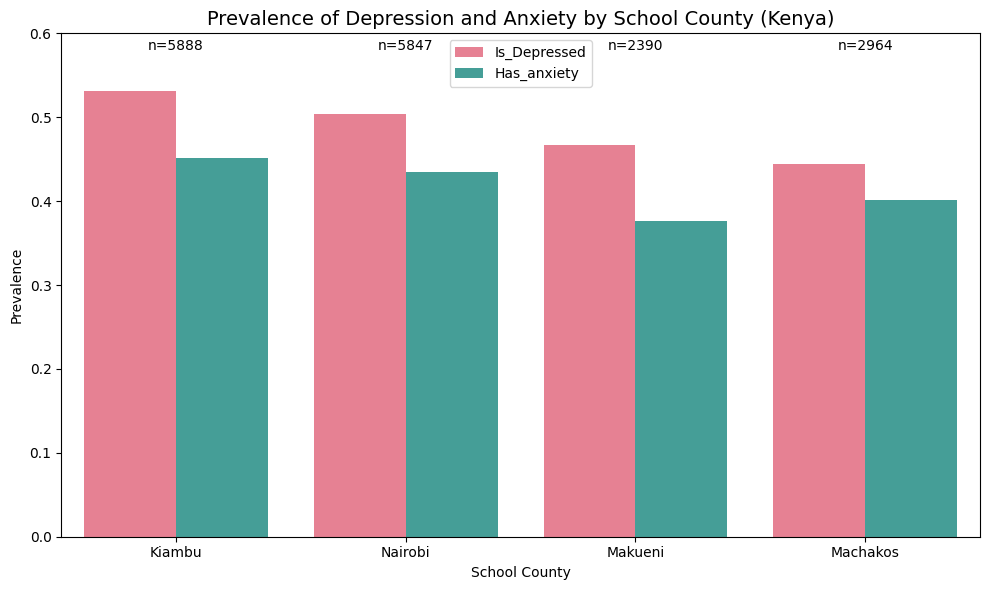

In [ ]:
data = {
    'School_County': ['Kiambu', 'Nairobi', 'Makueni', 'Machakos'],
    'Is_Depressed': [0.531, 0.504, 0.467, 0.444],
    'Has_anxiety': [0.451, 0.435, 0.376, 0.401],
    'n_students': [5888, 5847, 2390, 2964]
}
plot_df = pd.DataFrame(data)

# Bar plot
plot_df = plot_df.melt(id_vars='School_County', value_vars=['Is_Depressed', 'Has_anxiety'],
                        var_name='Condition', value_name='Prevalence')

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='School_County', y='Prevalence', hue='Condition', palette='husl')
plt.title('Prevalence of Depression and Anxiety by School County (Kenya)', fontsize=14)
plt.ylabel('Prevalence')
plt.xlabel('School County')
plt.legend(title='')
plt.ylim(0, 0.6)

# Add n_students as text
for i, row in enumerate(data['School_County']):
    n = data['n_students'][i]
    plt.text(i, 0.58, f'n={n}', ha='center', fontsize=10, color='black')
plt.savefig('Image/Prevalence of Depression and Anxiety by School County (Kenya).png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

- Higher rates in Kiambu and Nairobi reflect the psychological burden of urban and peri-urban school environments. Kiambu > Nairobi, meaning, Kiambu has many elite boarding schools with intense regimes (early wake-ups, long study hours)
- Lower rates in Makueni and Machakos suggest protective factors in rural school settings. Makueni lowest its known for cohesive, agrarian communities contributing to social support buffers mental health.
- `Depression > Anxiety` in all counties suggesting low mood, hopelessness dominate over worry/fear. Machakos has the smallest gap indicating that anxiety is relatively higher, possibly due to drought, economic instability etc,.


### 3.7 Feature Engineering

**Feature Importance**

In [28]:
# Average parental education
df['Parental_Education_Avg'] = df[['Fathers_Education', 'Mothers_Education']].mean(axis=1)

# PHQ-GAD interaction ratio
df['PHQ_GAD_Ratio'] = df['PHQ_Totals'] / (df['GAD_Totals'] + 1)

# Engagement composite feature
df['Engagement_Score'] = df[['Sports', 'Co_Curricular', 'Percieved_Academic_Abilities']].sum(axis=1)


In [29]:
from sklearn.preprocessing import LabelEncoder
import joblib
import os

object_cols = df.select_dtypes(include=['object']).columns.tolist()
id_keywords = ['participant_ID']
cols_to_encode = [
    col for col in object_cols
    if not any(kw.lower() in col.lower() for kw in id_keywords)
]

encoders = {}

for col in cols_to_encode:
    le = LabelEncoder()
    df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))+1
    encoders[col] = le



# Show mapping
mapping = pd.DataFrame({
    'code': range(len(le.classes_)),
    'original_value': le.classes_
})
encoded_cols = [f'{c}_encoded' for c in cols_to_encode]

Text(0.5, 1.0, 'Preliminary Feature Importance for Depression and Anxiety Prediction')

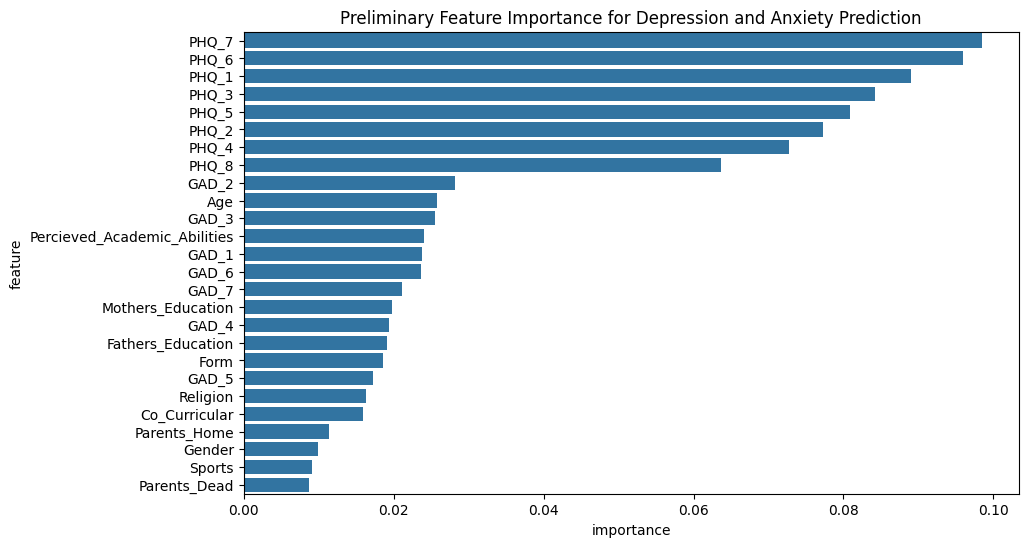

In [ ]:
from sklearn.ensemble import RandomForestClassifier
numerical_cols = ["Age", "Gender", "Form", "Religion",     
    "Parents_Home", "Parents_Dead", "Fathers_Education", "Mothers_Education",
    "Co_Curricular", "Sports", "Percieved_Academic_Abilities",
    "PHQ_1", "PHQ_2", "PHQ_3", "PHQ_4", "PHQ_5", "PHQ_6", "PHQ_7", "PHQ_8", 
    "GAD_1", "GAD_2", "GAD_3", "GAD_4", "GAD_5", "GAD_6", "GAD_7"]
# Quick feature importance
X = df[numerical_cols]
y = df['Is_Depressed']

# Handle any remaining missing values
X = X.fillna(X.median())

# Train simple RF model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title('Preliminary Feature Importance for Depression and Anxiety Prediction')
plt.savefig('Image/Preliminary Feature Importance for Depression.png', dpi=300, bbox_inches='tight')


FileNotFoundError: [Errno 2] No such file or directory: 'Image/Preliminary Feature Importance for Anxiety.png'

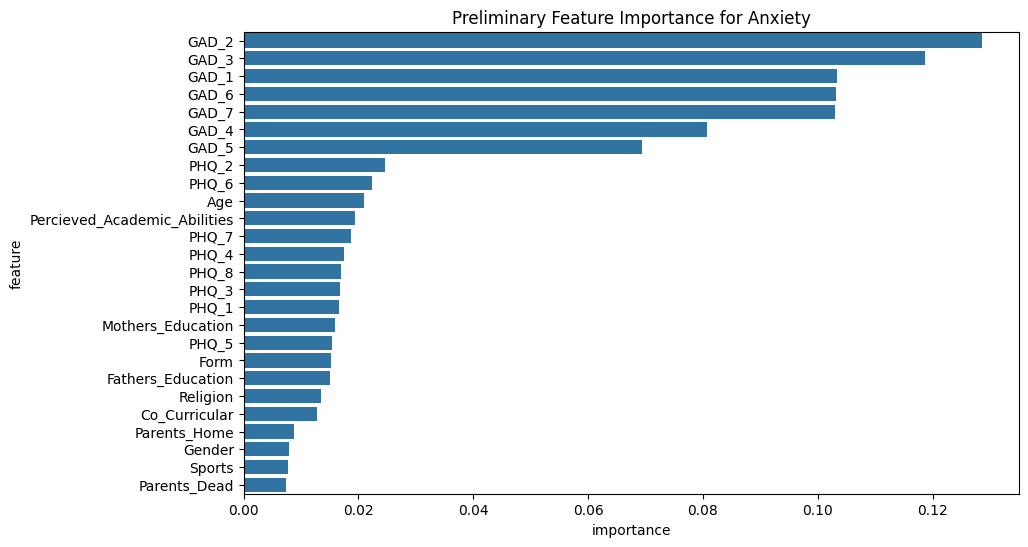

In [ ]:
from sklearn.ensemble import RandomForestClassifier

numerical_cols = ["Age", "Gender", "Form", "Religion",     
    "Parents_Home", "Parents_Dead", "Fathers_Education", "Mothers_Education",
    "Co_Curricular", "Sports", "Percieved_Academic_Abilities",
    "PHQ_1", "PHQ_2", "PHQ_3", "PHQ_4", "PHQ_5", "PHQ_6", "PHQ_7", "PHQ_8", 
    "GAD_1", "GAD_2", "GAD_3", "GAD_4", "GAD_5", "GAD_6", "GAD_7"]
# feature importance
X = df[numerical_cols]
y = df['Has_anxiety']

# Handle any remaining missing values
X = X.fillna(X.median())

# Train simple RF model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title('Preliminary Feature Importance for Anxiety')
plt.savefig('Image/Preliminary Feature Importance for Anxiety.png', dpi=300, bbox_inches='tight')

In [32]:
# Average parental education
df['Parental_Education_Avg'] = df[['Fathers_Education', 'Mothers_Education']].mean(axis=1)

# PHQ-GAD interaction ratio
df['PHQ_GAD_Ratio'] = df['PHQ_Totals'] / (df['GAD_Totals'] + 1)

# Engagement/Resilience composite feature
df['Engagement_Score'] = df[['Sports', 'Co_Curricular', 'Percieved_Academic_Abilities']].sum(axis=1)


In [34]:
from sklearn.preprocessing import StandardScaler

# selecting features for clustering
num_features = ['PHQ_Totals', 'GAD_Totals', 'Parental_Education_Avg', 'Sports']

# Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_features])


* Scaled so that features with larger scales do not dominate the PCA process.

In [35]:
from sklearn.cluster import AgglomerativeClustering

# Initialize and fit the model
agg = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward',
    metric='euclidean'
)

df['Cluster'] = agg.fit_predict(X_scaled)


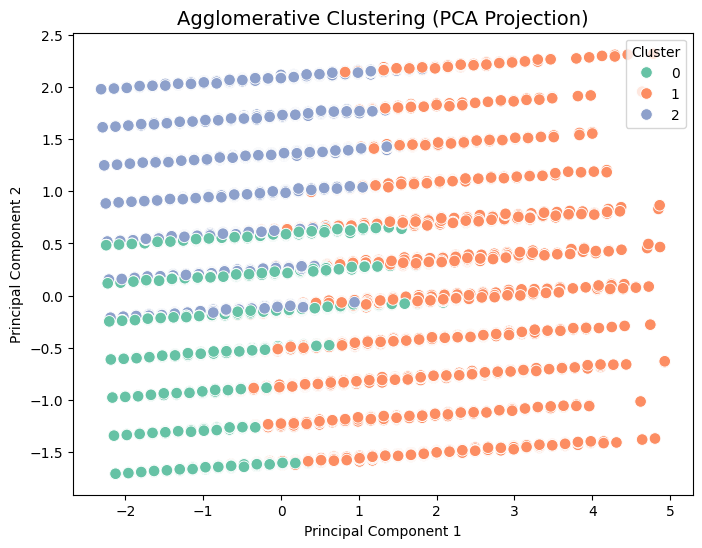

In [36]:
from sklearn.decomposition import PCA

# using 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

# visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=70)
plt.title("Agglomerative Clustering (PCA Projection)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Agglomerative clustering identified **three distinct participant groups** with similar characteristics.

* **Cluster 1 (orange)** mainly appears on the right side of the PCA plot, while **Clusters 0 (green)** and **2 (blue)** are concentrated on the left.
* This spatial separation indicates clear differences in feature patterns among the clusters.
* The algorithm effectively **groups individuals with similar mental health and background traits**, revealing meaningful structure within the dataset.


In [37]:
# Explained variance ratio
pca.explained_variance_ratio_

array([0.41398891, 0.26549009])

- PCA 1 explains about 41% of the total variance of our dataset.

- PCA 2 explains about 27% of the total variance.

In [38]:
# Get the PCA loadings (components)
loadings = pca.components_

# Create a DataFrame to visualize the loadings for each component
pca_loadings_df = pd.DataFrame(loadings.T, columns=['PCA 1', 'PCA 2'], index=num_features)

# Display the loadings
print("PCA Loadings (contributions of each feature to PCA 1 and PCA 2):\n")
print(pca_loadings_df)

PCA Loadings (contributions of each feature to PCA 1 and PCA 2):

                           PCA 1     PCA 2
PHQ_Totals              0.706456  0.026539
GAD_Totals              0.706021  0.043051
Parental_Education_Avg -0.038786  0.704964
Sports                 -0.030817  0.707438


- PCA 1 is mainly driven by **PHQ_Totals** and **GAD_Totals**, representing a **mental distress dimension** (higher scores means more depression and anxiety).
- PCA 2 is dominated by **Parental_Education_Avg** and **Sports**, capturing a **socio-lifestyle dimension** linked to education and physical activity.


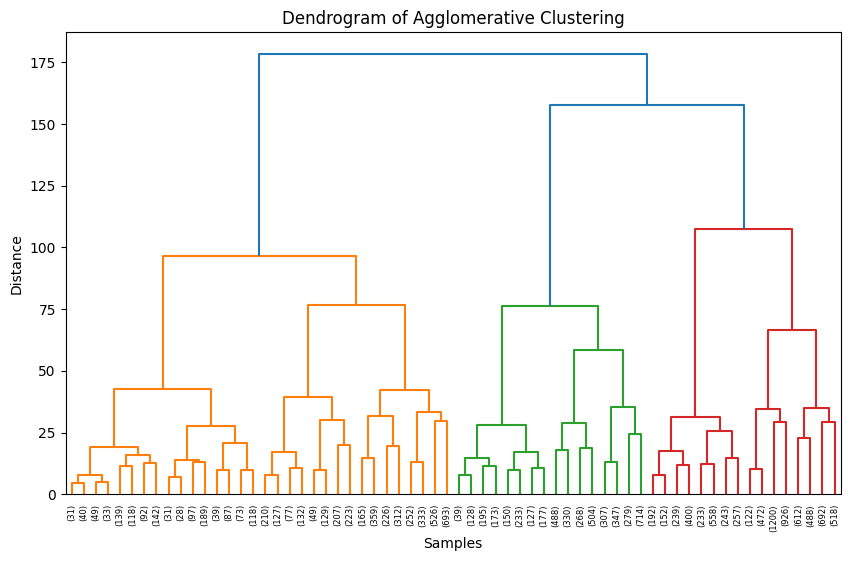

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

# hierarchical clustering for dendrogram
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)  # show last 5 merges
plt.title("Dendrogram of Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


This **dendrogram** visualizes the hierarchical structure produced by **Agglomerative Clustering**. It shows how individual participants were merged step by step based on their similarity.

* The **bottom of the dendrogram** represents individual participants.
* The **vertical lines** show the distance between merged clusters.
* The **height where two branches join** indicates how similar those clusters are, lower heights mean higher similarity, while taller joins show greater differences.
* The **three main colored clusters (orange, green, red)** show how the algorithm divided participants into distinct groups.
* The **large blue branches near the top** represent the final merges before forming the main clusters, confirming that three clusters are a reasonable choice since there are three major branches before a large jump in distance occurs.

The dendrogram confirms that the data naturally forms **three main clusters** of participants with similar psychological and demographic profiles, supporting the cluster pattern observed in the PCA projection.


# 4. Modelling

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import xgboost as xgb
from lightgbm import LGBMClassifier

X = df.drop(['Is_Depressed','Has_anxiety','PHQ_Totals',
             'GAD_Totals','PHQ_Functioning','GAD_Check','GAD_Functioning'], axis = 1)
y = df[['Is_Depressed','Has_anxiety']]

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Split the temporary set into validation and test sets
# This results in a typical 70% train, 15% validation, 15% test split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

categorical_cols = ['Boarding_day','School_type','School_Demographics','School_County']
numerical_cols = ["Age", "Gender", "Form", "Religion",     
    "Parents_Home", "Parents_Dead", "Fathers_Education", "Mothers_Education",
    "Co_Curricular", "Sports", "Percieved_Academic_Abilities",
    "PHQ_1", "PHQ_2", "PHQ_3", "PHQ_4", "PHQ_5", "PHQ_6", "PHQ_7", "PHQ_8", 
    "GAD_1", "GAD_2", "GAD_3", "GAD_4", "GAD_5", "GAD_6", "GAD_7"]

#Preprocessing pipeline
pipeline_numeric = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.8))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', pipeline_numeric, numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

#models in a dictionary
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
    
}

Training LogisticRegression
Depression Accuracy: 0.9286
Anxiety Accuracy:    0.9411
Average Accuracy:    0.9349
Validation Avg Accuracy: 0.9218

LogisticRegression Classification Report for Is_Depressed:
              precision    recall  f1-score   support

           0      0.955     0.959     0.957       775
           1      0.933     0.935     0.934      1080
           2      0.897     0.912     0.905       546
           3      0.880     0.830     0.854       141
           4      0.867     0.591     0.703        22

    accuracy                          0.929      2564
   macro avg      0.906     0.845     0.870      2564
weighted avg      0.928     0.929     0.928      2564


LogisticRegression Classification Report for Has_anxiety:
              precision    recall  f1-score   support

           0      0.975     0.958     0.966      1038
           1      0.926     0.938     0.932       945
           2      0.903     0.917     0.910       448
           3      0.924     0.9

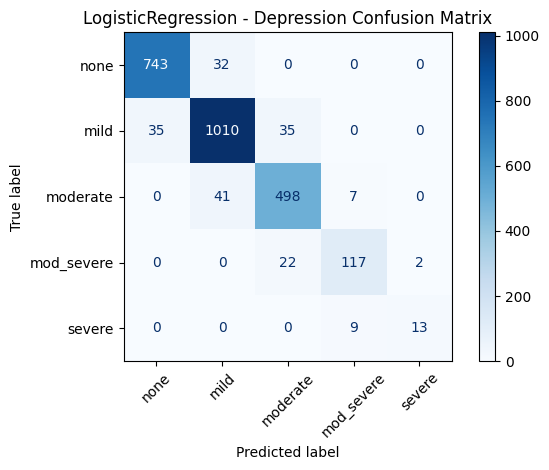

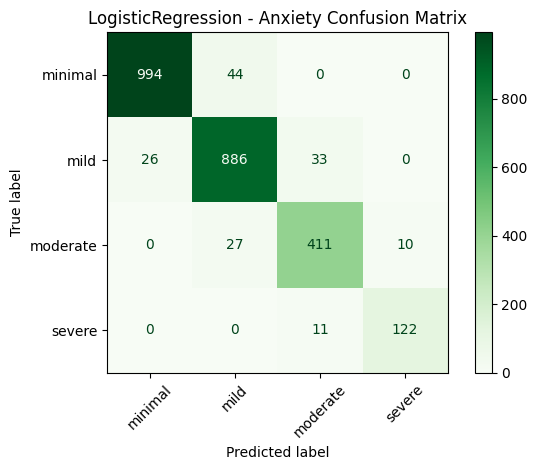

Training RandomForest
Depression Accuracy: 0.8077
Anxiety Accuracy:    0.8522
Average Accuracy:    0.8300
Validation Avg Accuracy: 0.8338

RandomForest Classification Report for Is_Depressed:
              precision    recall  f1-score   support

           0      0.924     0.841     0.880       775
           1      0.790     0.893     0.838      1080
           2      0.721     0.749     0.735       546
           3      0.657     0.326     0.436       141
           4      0.000     0.000     0.000        22

    accuracy                          0.808      2564
   macro avg      0.618     0.562     0.578      2564
weighted avg      0.801     0.808     0.800      2564


RandomForest Classification Report for Has_anxiety:
              precision    recall  f1-score   support

           0      0.947     0.875     0.909      1038
           1      0.804     0.891     0.845       945
           2      0.760     0.815     0.787       448
           3      0.897     0.526     0.664      

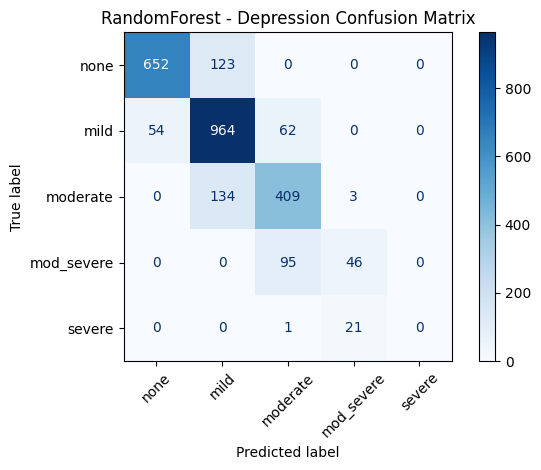

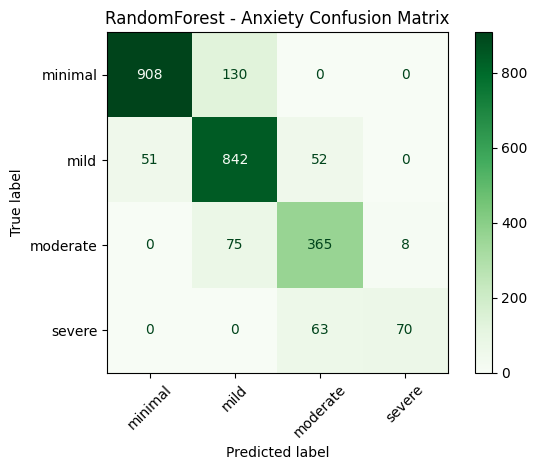

Training XGBoost
Depression Accuracy: 0.8748
Anxiety Accuracy:    0.9017
Average Accuracy:    0.8883
Validation Avg Accuracy: 0.8917

XGBoost Classification Report for Is_Depressed:
              precision    recall  f1-score   support

           0      0.933     0.919     0.926       775
           1      0.878     0.903     0.890      1080
           2      0.819     0.837     0.828       546
           3      0.750     0.638     0.690       141
           4      0.692     0.409     0.514        22

    accuracy                          0.875      2564
   macro avg      0.815     0.741     0.770      2564
weighted avg      0.874     0.875     0.874      2564


XGBoost Classification Report for Has_anxiety:
              precision    recall  f1-score   support

           0      0.959     0.931     0.945      1038
           1      0.876     0.905     0.890       945
           2      0.831     0.866     0.848       448
           3      0.904     0.774     0.834       133

    accur

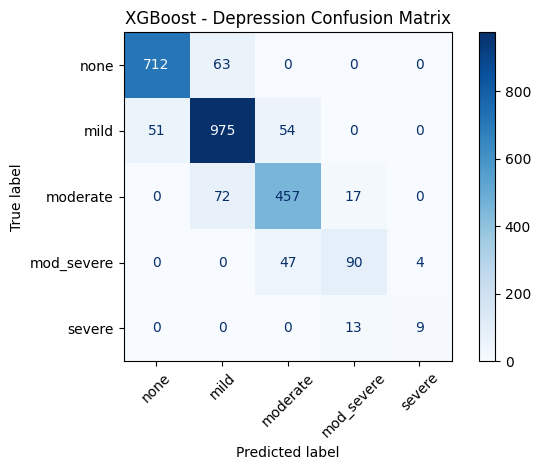

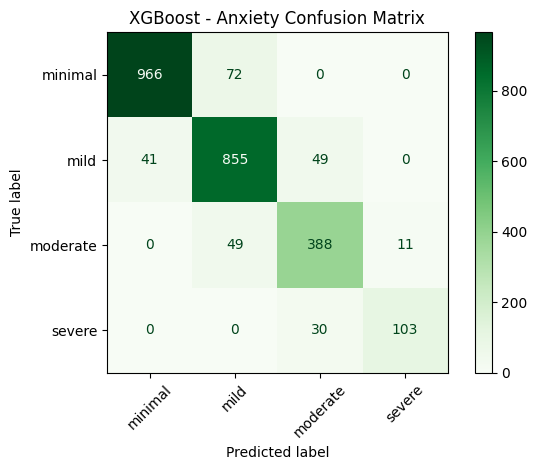

Training LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4608
[LightGBM] [Info] Number of data points in the train set: 11962, number of used features: 27
[LightGBM] [Info] Start training from score -1.175567
[LightGBM] [Info] Start training from score -0.852102
[LightGBM] [Info] Start training from score -1.572267
[LightGBM] [Info] Start training from score -2.979315
[LightGBM] [Info] Start training from score -5.045685
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4608
[LightGBM] [Info] Number of data points in the train set: 11962, number of used features: 27
[LightGBM] [Info] Start training from score -0.941862
[Ligh

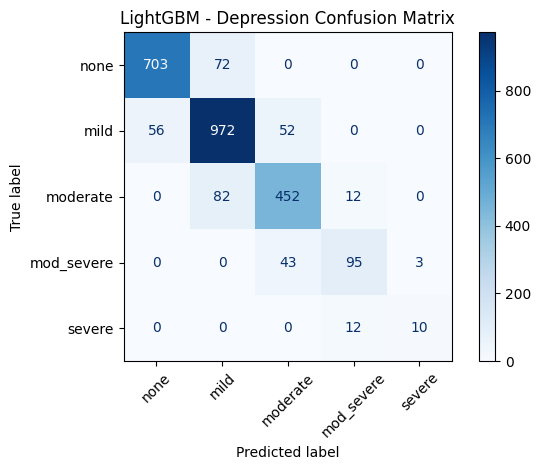

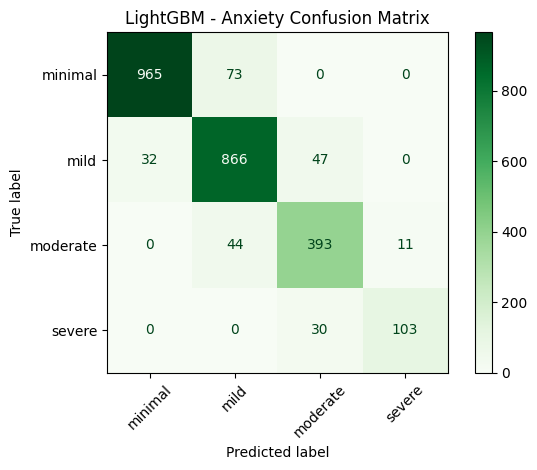

Model Comparison:
LogisticRegression: Depression = 0.929, Anxiety = 0.941, Avg = 0.935
RandomForest: Depression = 0.808, Anxiety = 0.852, Avg = 0.830
XGBoost: Depression = 0.875, Anxiety = 0.902, Avg = 0.888
LightGBM: Depression = 0.871, Anxiety = 0.908, Avg = 0.889


In [41]:
results = {}

for name, base_model in models.items():
    print(f"Training {name}")
    
    # Create pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', MultiOutputClassifier(base_model))
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = pipeline.predict(X_test)

    # --- Compute per-target accuracy ---
    acc_dep = accuracy_score(y_test['Is_Depressed'], y_pred[:, 0])
    acc_anx = accuracy_score(y_test['Has_anxiety'], y_pred[:, 1])
    acc_avg = (acc_dep + acc_anx) / 2  # optional average accuracy
    
    print(f"Depression Accuracy: {acc_dep:.4f}")
    print(f"Anxiety Accuracy:    {acc_anx:.4f}")
    print(f"Average Accuracy:    {acc_avg:.4f}")

    # Validation predictions
    val_pred = pipeline.predict(X_val)
    val_acc_dep = accuracy_score(y_val['Is_Depressed'], val_pred[:, 0])
    val_acc_anx = accuracy_score(y_val['Has_anxiety'], val_pred[:, 1])
    val_acc_avg = (val_acc_dep + val_acc_anx) / 2
    print(f"Validation Avg Accuracy: {val_acc_avg:.4f}")
    
    # Classification reports per target
    for i, target in enumerate(y_test.columns):
        print(f"\n{name} Classification Report for {target}:")
        print(classification_report(
            y_test[target],
            y_pred[:, i],
            digits=3
        ))

    # Confusion Matrix
    # Depression
    cm_dep = confusion_matrix(y_test['Is_Depressed'], y_pred[:, 0])
    ConfusionMatrixDisplay(
        cm_dep,
        display_labels=['none', 'mild', 'moderate', 'mod_severe', 'severe']
    ).plot(cmap='Blues', xticks_rotation=45)
    plt.title(f'{name} - Depression Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Anxiety
    cm_anx = confusion_matrix(y_test['Has_anxiety'], y_pred[:, 1])
    ConfusionMatrixDisplay(
        cm_anx,
        display_labels=['minimal', 'mild', 'moderate', 'severe']
    ).plot(cmap='Greens', xticks_rotation=45)
    plt.title(f'{name} - Anxiety Confusion Matrix')
    plt.tight_layout()
    plt.show()

    results[name] = {
        'depression_accuracy': acc_dep,
        'anxiety_accuracy': acc_anx,
        'average_accuracy': acc_avg
    }

print("Model Comparison:")
for name, res in results.items():
    print(f"{name}: Depression = {res['depression_accuracy']:.3f}, "
          f"Anxiety = {res['anxiety_accuracy']:.3f}, "
          f"Avg = {res['average_accuracy']:.3f}")


In [42]:
import lightgbm as lgb
params = {
    'Logistic': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'clf__estimator__C': [0.1, 1, 10],
            'clf__estimator__penalty': ['l2', 'l1'],
            'clf__estimator__solver': ['liblinear']
        }
    },
    
    'RandomForest': {
        'model': RandomForestClassifier(
            random_state=42,
            n_jobs=-1
        ),
        'params': {
            'clf__estimator__n_estimators': [100, 200],
            'clf__estimator__max_depth': [None, 10, 20],
            'clf__estimator__min_samples_split': [2, 5]
        }
    },
    
    'XGBoost': {
        'model': xgb.XGBClassifier(
            random_state=42,
            eval_metric='logloss',
            n_jobs=-1
        ),
        'params': {
            'clf__estimator__n_estimators': [100, 200],
            'clf__estimator__max_depth': [3, 6],
            'clf__estimator__learning_rate': [0.1, 0.01]
        }
    },
    
    'LightGBM': {
        'model': lgb.LGBMClassifier(
            random_state=42,
            n_jobs=-1,
            verbose=-1
        ),
        'params': {
            'clf__estimator__n_estimators': [100, 200],
            'clf__estimator__max_depth': [3, 6],
            'clf__estimator__learning_rate': [0.1, 0.05]
        }
    }
}


Training Logistic with GridSearchCV
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for Logistic: {'clf__estimator__C': 0.1, 'clf__estimator__penalty': 'l2', 'clf__estimator__solver': 'liblinear'}
Best CV accuracy for Logistic: nan
Is_Depressed Accuracy: 0.8108
Has_anxiety Accuracy: 0.8541
Average Accuracy: 0.8325
Validation Average Accuracy: 0.8293

Logistic Classification Report for Is_Depressed:
              precision    recall  f1-score   support

           0      0.933     0.968     0.950       775
           1      0.794     0.945     0.863      1080
           2      0.667     0.560     0.609       546
           3      0.133     0.014     0.026       141
           4      0.000     0.000     0.000        22

    accuracy                          0.811      2564
   macro avg      0.505     0.498     0.490      2564
weighted avg      0.766     0.811     0.782      2564


Logistic Classification Report for Has_anxiety:
              precision    reca

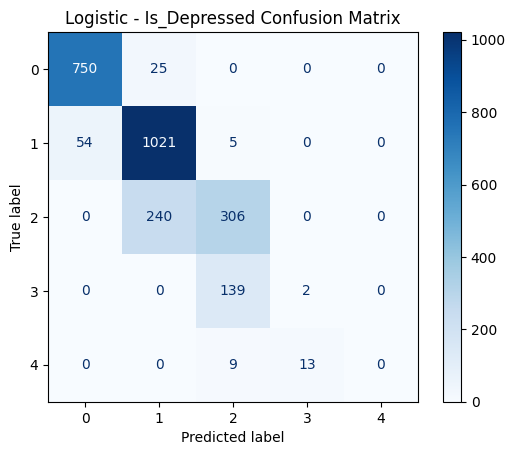

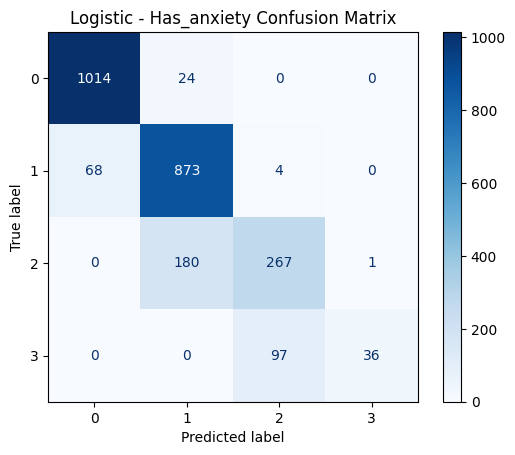


Training RandomForest with GridSearchCV
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for RandomForest: {'clf__estimator__max_depth': None, 'clf__estimator__min_samples_split': 2, 'clf__estimator__n_estimators': 100}
Best CV accuracy for RandomForest: nan
Is_Depressed Accuracy: 0.8077
Has_anxiety Accuracy: 0.8522
Average Accuracy: 0.8300
Validation Average Accuracy: 0.8338

RandomForest Classification Report for Is_Depressed:
              precision    recall  f1-score   support

           0      0.924     0.841     0.880       775
           1      0.790     0.893     0.838      1080
           2      0.721     0.749     0.735       546
           3      0.657     0.326     0.436       141
           4      0.000     0.000     0.000        22

    accuracy                          0.808      2564
   macro avg      0.618     0.562     0.578      2564
weighted avg      0.801     0.808     0.800      2564


RandomForest Classification Report for Has_anxie

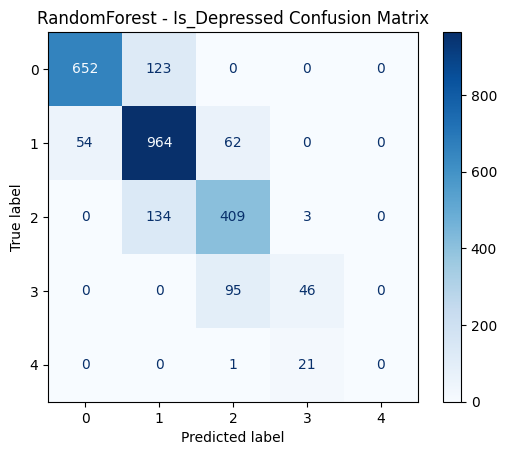

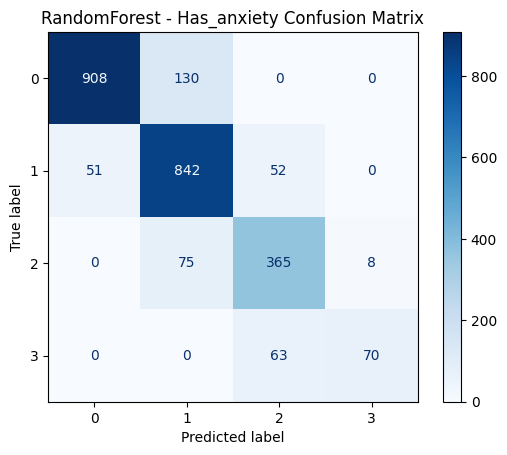


Training XGBoost with GridSearchCV
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for XGBoost: {'clf__estimator__learning_rate': 0.1, 'clf__estimator__max_depth': 3, 'clf__estimator__n_estimators': 100}
Best CV accuracy for XGBoost: nan
Is_Depressed Accuracy: 0.8237
Has_anxiety Accuracy: 0.8561
Average Accuracy: 0.8399
Validation Average Accuracy: 0.8476

XGBoost Classification Report for Is_Depressed:
              precision    recall  f1-score   support

           0      0.912     0.866     0.888       775
           1      0.808     0.870     0.838      1080
           2      0.754     0.753     0.753       546
           3      0.745     0.560     0.640       141
           4      0.786     0.500     0.611        22

    accuracy                          0.824      2564
   macro avg      0.801     0.710     0.746      2564
weighted avg      0.824     0.824     0.822      2564


XGBoost Classification Report for Has_anxiety:
              precision    

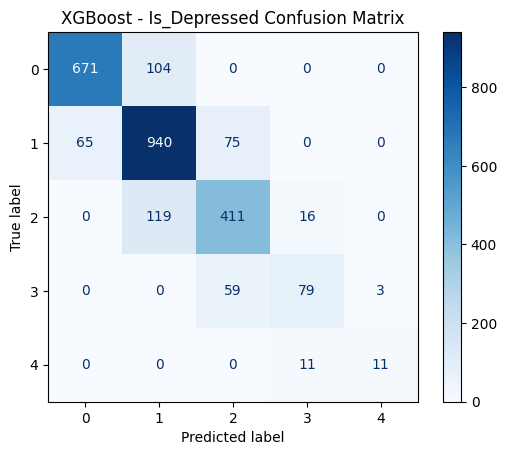

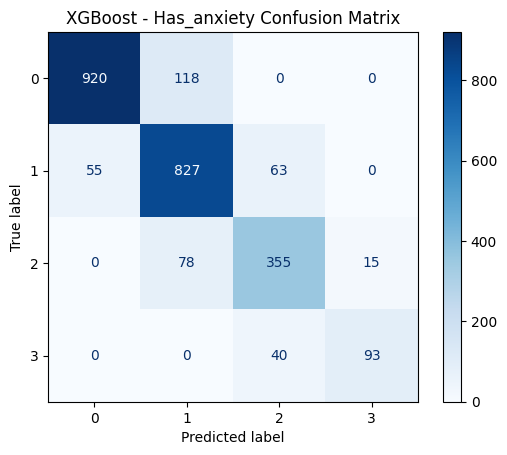


Training LightGBM with GridSearchCV
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for LightGBM: {'clf__estimator__learning_rate': 0.1, 'clf__estimator__max_depth': 3, 'clf__estimator__n_estimators': 100}
Best CV accuracy for LightGBM: nan
Is_Depressed Accuracy: 0.8522
Has_anxiety Accuracy: 0.8740
Average Accuracy: 0.8631
Validation Average Accuracy: 0.8693

LightGBM Classification Report for Is_Depressed:
              precision    recall  f1-score   support

           0      0.919     0.877     0.898       775
           1      0.835     0.894     0.864      1080
           2      0.810     0.804     0.807       546
           3      0.807     0.624     0.704       141
           4      0.750     0.545     0.632        22

    accuracy                          0.852      2564
   macro avg      0.824     0.749     0.781      2564
weighted avg      0.853     0.852     0.851      2564


LightGBM Classification Report for Has_anxiety:
              precisio

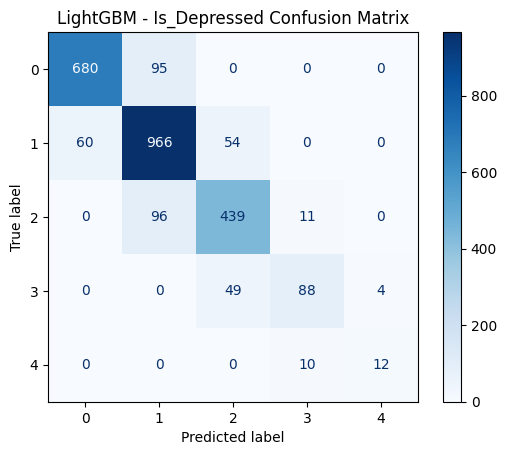

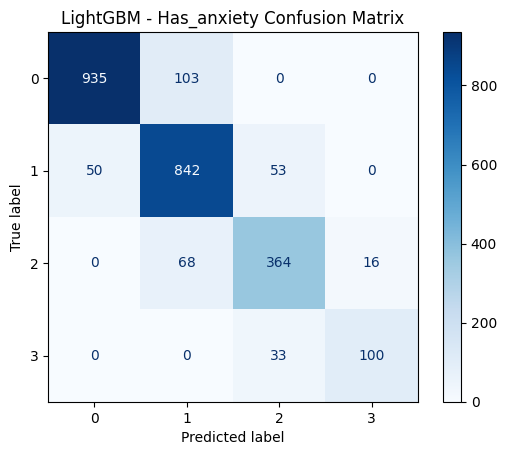

Model Comparison:
Logistic:
  Is_Depressed Test Accuracy: 0.811
  Has_anxiety Test Accuracy: 0.854
  Average Test Accuracy: 0.832
  Average Validation Accuracy: 0.829

RandomForest:
  Is_Depressed Test Accuracy: 0.808
  Has_anxiety Test Accuracy: 0.852
  Average Test Accuracy: 0.830
  Average Validation Accuracy: 0.834

XGBoost:
  Is_Depressed Test Accuracy: 0.824
  Has_anxiety Test Accuracy: 0.856
  Average Test Accuracy: 0.840
  Average Validation Accuracy: 0.848

LightGBM:
  Is_Depressed Test Accuracy: 0.852
  Has_anxiety Test Accuracy: 0.874
  Average Test Accuracy: 0.863
  Average Validation Accuracy: 0.869



In [43]:
results = {}

# Loop over each model configuration
for name, config in params.items():
    print(f"\nTraining {name} with GridSearchCV")

    # Build pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clf', MultiOutputClassifier(config['model']))
    ])

    # Grid search
    grid = GridSearchCV(
        pipeline,
        param_grid=config['params'],
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    # Fit model
    grid.fit(X_train, y_train)

    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best CV accuracy for {name}: {grid.best_score_:.4f}")

    # Best estimator
    best_model = grid.best_estimator_

    # Predict on test set
    y_pred = best_model.predict(X_test)

    # Compute per-target accuracy
    acc_dict = {}
    for i, target in enumerate(y_test.columns):
        acc = accuracy_score(y_test[target], y_pred[:, i])
        acc_dict[target] = acc
        print(f"{target} Accuracy: {acc:.4f}")

    avg_acc = sum(acc_dict.values()) / len(acc_dict)
    print(f"Average Accuracy: {avg_acc:.4f}")

    # Validation predictions
    val_pred = best_model.predict(X_val)
    val_acc_dict = {}
    for i, target in enumerate(y_val.columns):
        val_acc = accuracy_score(y_val[target], val_pred[:, i])
        val_acc_dict[target] = val_acc
    val_avg_acc = sum(val_acc_dict.values()) / len(val_acc_dict)
    print(f"Validation Average Accuracy: {val_avg_acc:.4f}")

    # classification reports per target
    for i, target in enumerate(y_test.columns):
        print(f"\n{name} Classification Report for {target}:")
        print(classification_report(
            y_test[target],
            y_pred[:, i],
            digits=3
        ))

    # Confusion Matrices per target
    for i, target in enumerate(y_test.columns):
        cm = confusion_matrix(y_test[target], y_pred[:, i])
        classes = sorted(list(set(y_test[target])))
        ConfusionMatrixDisplay(cm, display_labels=classes).plot(cmap='Blues')
        plt.title(f'{name} - {target} Confusion Matrix')
        plt.show()

    results[name] = {
        'best_params': grid.best_params_,
        'cv_accuracy': grid.best_score_,
        'test_accuracy_per_target': acc_dict,
        'average_test_accuracy': avg_acc,
        'validation_accuracy_per_target': val_acc_dict,
        'average_validation_accuracy': val_avg_acc
    }


print("Model Comparison:")
for name, res in results.items():
    print(f"{name}:")
    for target, acc in res['test_accuracy_per_target'].items():
        print(f"  {target} Test Accuracy: {acc:.3f}")
    print(f"  Average Test Accuracy: {res['average_test_accuracy']:.3f}")
    print(f"  Average Validation Accuracy: {res['average_validation_accuracy']:.3f}\n")
